## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

## Loading The Data

In [2]:
df = pd.read_csv('netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


## Understand The Data

In [3]:
df.shape

(8790, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

## Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df[['date_added']].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-22
4,2021-09-24


## Performing Exploratory Data Analysis (EDA) 

### Total Content on Netflix

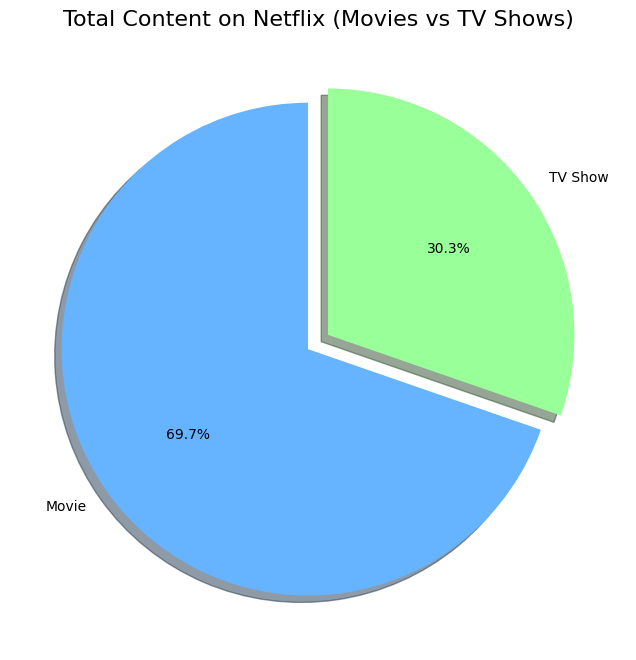

In [10]:
content_count_by_type = df['type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(content_count_by_type, labels=content_count_by_type.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90, explode=(0.05, 0.05), shadow=True)

plt.title('Total Content on Netflix (Movies vs TV Shows)', fontsize=16)

plt.show()

### Content Added Over Time

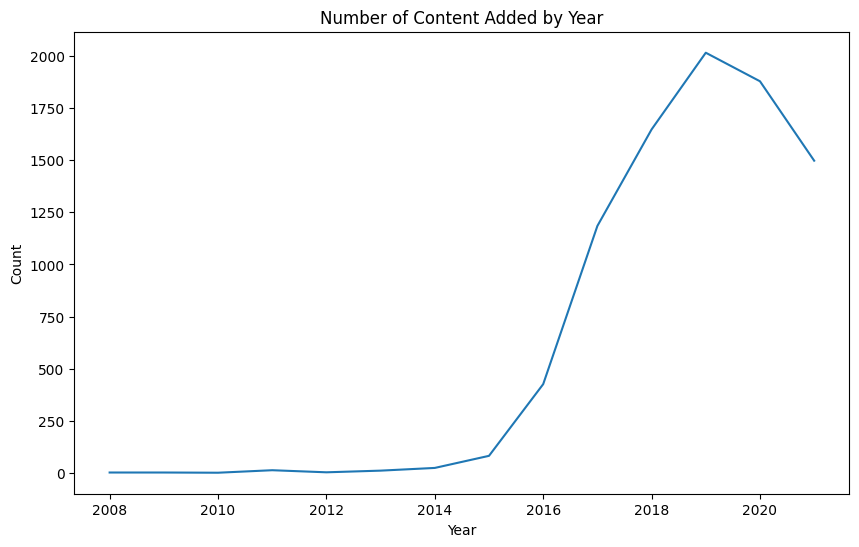

In [11]:
# Extracting the year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count the number of content added each year
content_added_by_year = df['year_added'].value_counts().sort_index()

# Plot the number of content added each year
plt.figure(figsize=(10,6))
sns.lineplot(x=content_added_by_year.index, y=content_added_by_year.values)
plt.title('Number of Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

 ### Distribution of Ratings

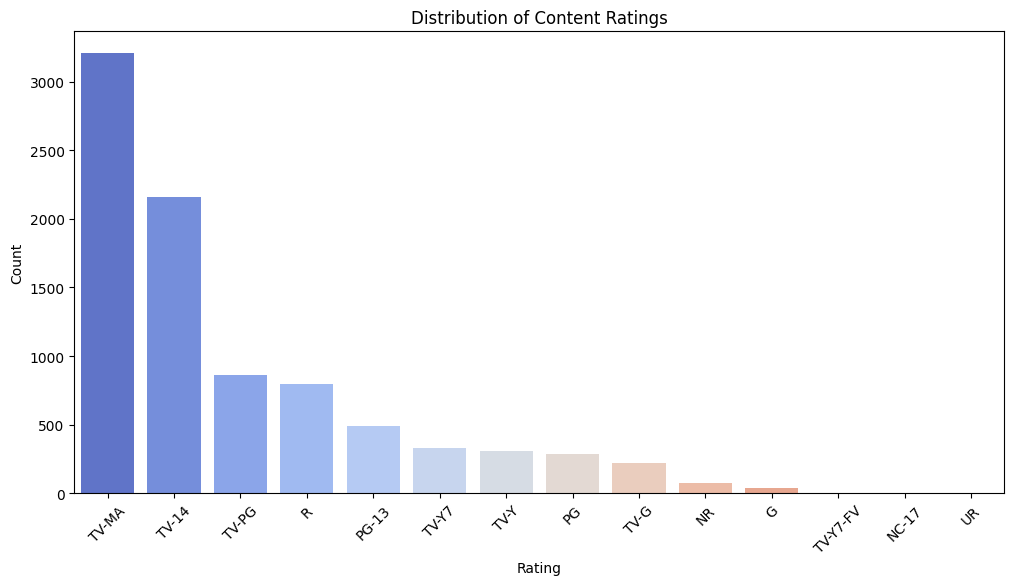

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', palette='coolwarm', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Content Duration Analysis

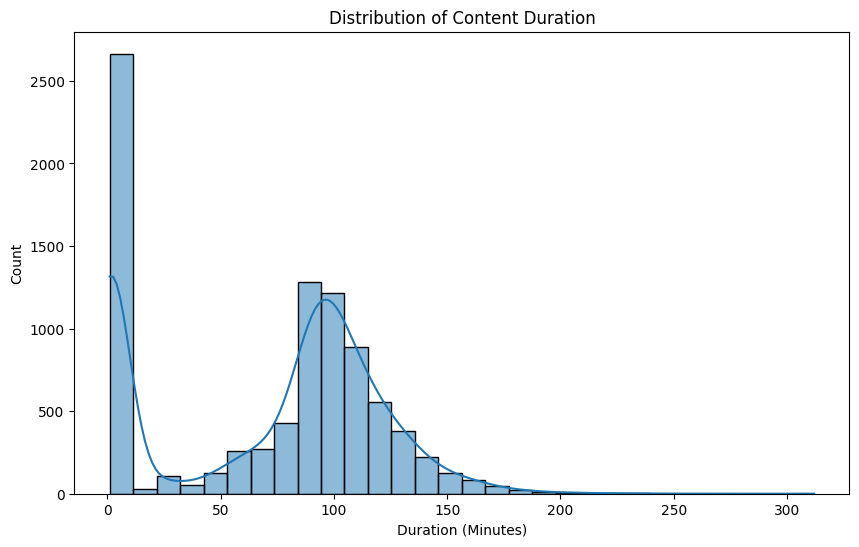

In [13]:
# Split 'duration' into numerical part for analysis
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='duration_minutes', bins=30, kde=True)
plt.title('Distribution of Content Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()


### Country-wise Content Distribution

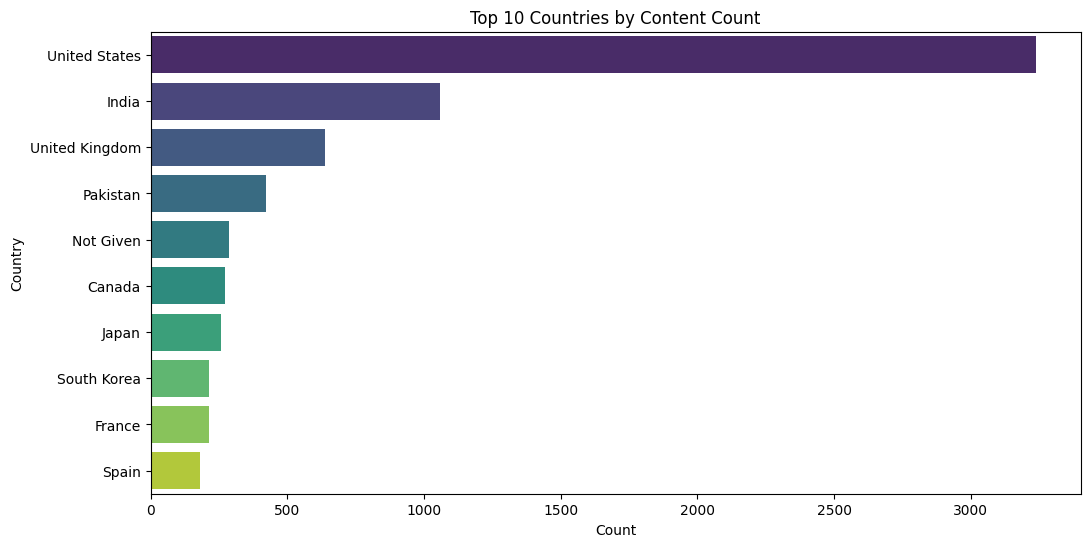

In [14]:
# Top 10 countries by content count
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Content Added per Month

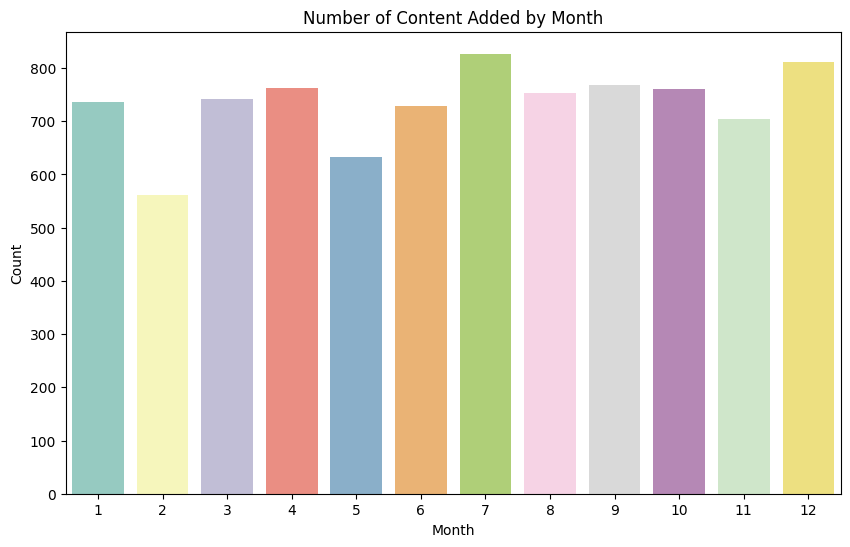

In [15]:
# Extract month from 'date_added'
df['month_added'] = df['date_added'].dt.month

content_by_month = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=content_by_month.index, y=content_by_month.values, palette='Set3')
plt.title('Number of Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


### Top Genres on Netflix

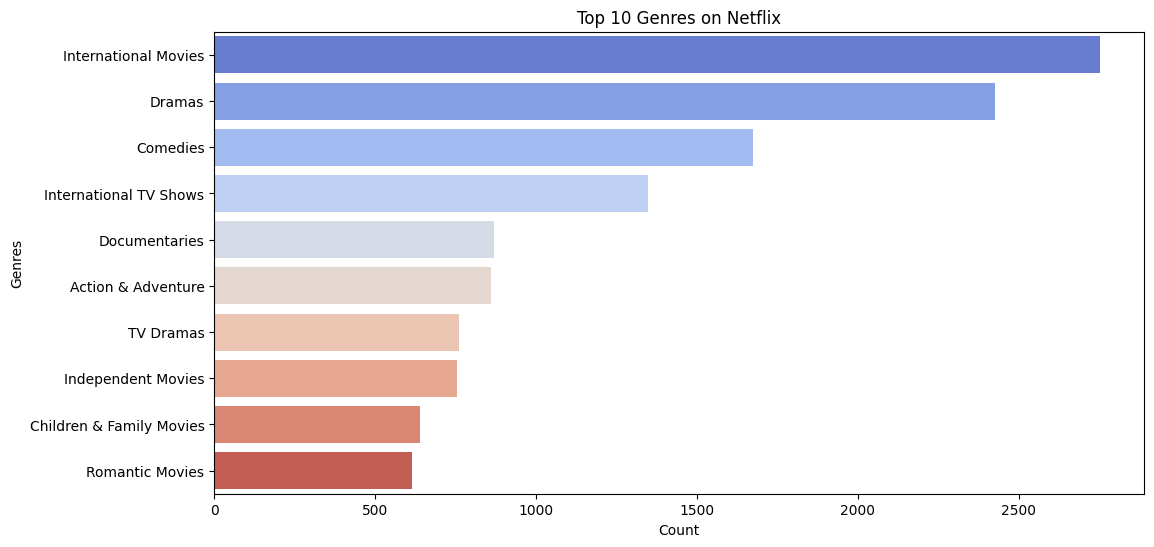

In [16]:
# Split 'listed_in' column (genres) and explode into individual rows
genres = df['listed_in'].str.split(', ').explode()

top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


### Correlation Analysis 

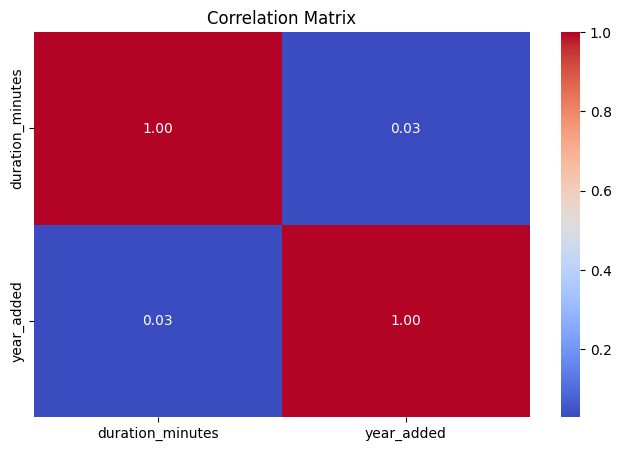

In [17]:
# Check correlation between numerical columns
correlation_matrix = df[['duration_minutes', 'year_added']].corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Top 10 Directors with the Most Titles

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64


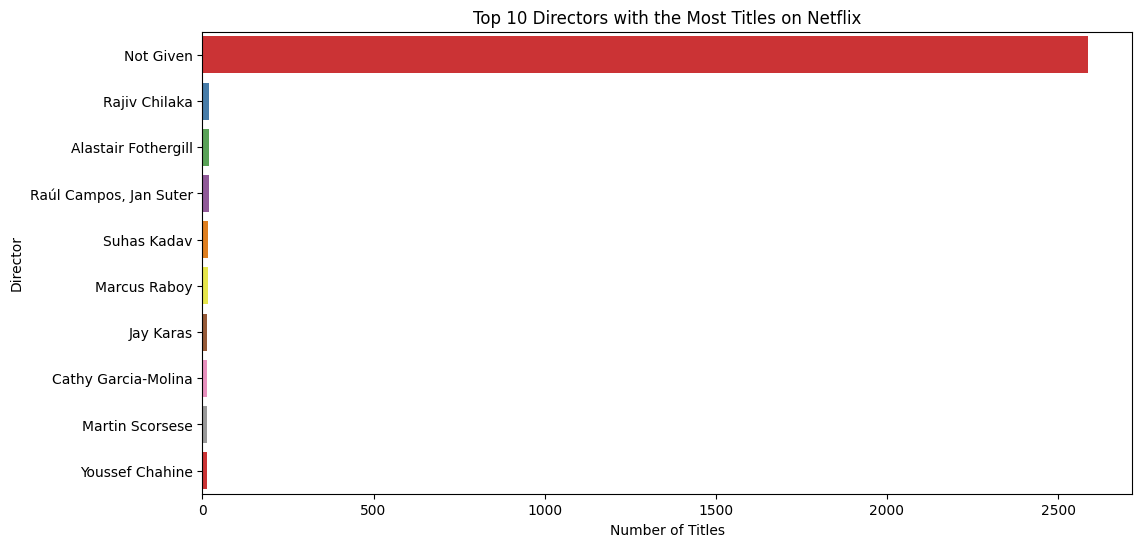

In [18]:
# Count the number of titles by each director
top_directors = df['director'].value_counts().head(10)

print(top_directors)

plt.figure(figsize=(12,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='Set1')
plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


## Feature Engineering 

In [19]:
# Duration Feature
df['duration_minutes'] = df.apply(lambda x: x['duration'].split()[0] if x['type'] == 'Movie' else 0, axis=1).astype(float)
df['seasons'] = df.apply(lambda x: x['duration'].split()[0] if x['type'] == 'TV Show' else 0, axis=1).astype(float)

In [20]:
# Creating Create Genre Features
genres = df['listed_in'].str.get_dummies(sep=', ')

df = pd.concat([df, genres], axis=1)

In [21]:
#Create a Feature for Popular Directors
top_10_directors = df['director'].value_counts().nlargest(10).index

df['top_director'] = df['director'].apply(lambda x: 1 if x in top_10_directors else 0)

In [22]:
# Content Age
from datetime import datetime

current_year = datetime.now().year

df['content_age'] = current_year - df['year_added']

In [23]:
# Create a binary column for new content (added in the last 2 years)
df['is_new'] = df['year_added'].apply(lambda x: 1 if current_year - x <= 2 else 0)

In [24]:
# Country Features
top_10_countries = df['country'].value_counts().nlargest(10).index

for country in top_10_countries:
    df[country] = df['country'].apply(lambda x: 1 if country in x else 0)

In [25]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,...,United States,India,United Kingdom,Pakistan,Not Given,Canada,Japan,South Korea,France,Spain
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,...,1,0,0,0,0,0,0,0,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,0,0,0,0,0,0,0,0,1,0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",...,1,0,0,0,0,0,0,0,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",...,0,0,0,0,0,0,0,0,0,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",...,1,0,0,0,0,0,0,0,0,0


In [26]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'year_added',
       'duration_minutes', 'month_added', 'seasons', 'Action & Adventure',
       'Anime Features', 'Anime Series', 'British TV Shows',
       'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies',
       'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries',
       'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies', 'International TV Shows',
       'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies', 'Movies',
       'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       '

## Machine Learning Models

In [27]:
features = [
    'type', 'release_year', 'duration_minutes', 'seasons', 
    'year_added', 'month_added', 'content_age', 'is_new',
    'Action & Adventure', 'Dramas', 'Comedies', 'Documentaries', 
    'Sci-Fi & Fantasy', 'Thrillers', 'United States', 'India', 'United Kingdom'
]

target = 'top_director'

X = df[features]
y = df[target]

X = pd.get_dummies(X, columns=['type'], drop_first=True)



## Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [31]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1836
           1       0.92      0.89      0.90       801

    accuracy                           0.94      2637
   macro avg       0.94      0.93      0.93      2637
weighted avg       0.94      0.94      0.94      2637



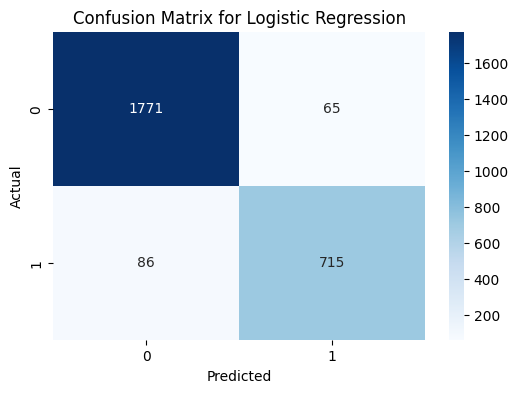

In [32]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This model is almost 94% accurate.

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1836
           1       0.84      0.86      0.85       801

    accuracy                           0.91      2637
   macro avg       0.89      0.89      0.89      2637
weighted avg       0.91      0.91      0.91      2637



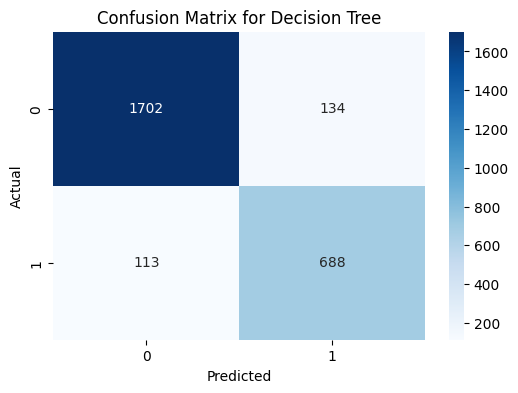

In [36]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This model is almost 91% accurate.

## K Nearest Neighbor

In [37]:
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [39]:
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1836
           1       0.90      0.90      0.90       801

    accuracy                           0.94      2637
   macro avg       0.93      0.93      0.93      2637
weighted avg       0.94      0.94      0.94      2637



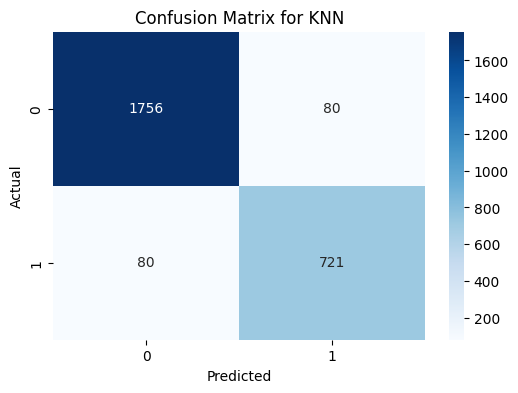

In [40]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This model is almost 94% accurate.

## Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [42]:
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [43]:
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1836
           1       0.80      0.94      0.86       801

    accuracy                           0.91      2637
   macro avg       0.88      0.92      0.90      2637
weighted avg       0.92      0.91      0.91      2637



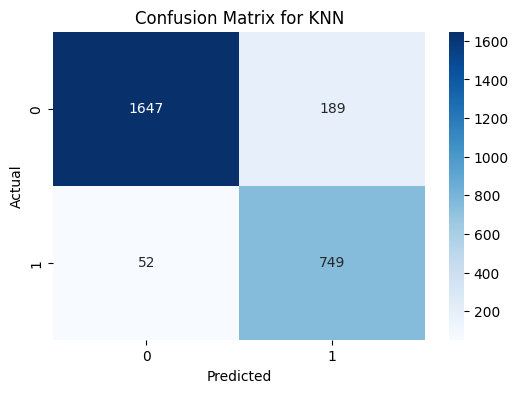

In [44]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_gnb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This model is almost 91% accurate. 

## Support Vector Classifier

In [45]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [46]:
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [47]:
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1836
           1       0.86      0.91      0.89       801

    accuracy                           0.93      2637
   macro avg       0.91      0.92      0.92      2637
weighted avg       0.93      0.93      0.93      2637



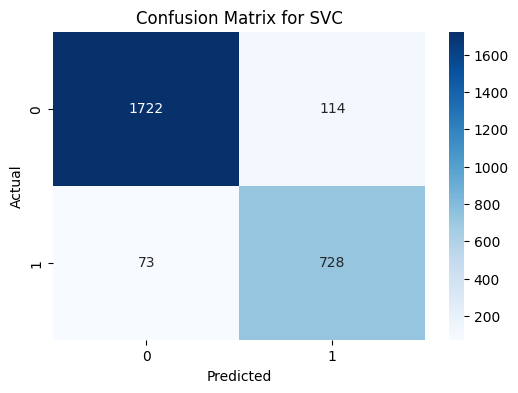

In [48]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_svc_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This model is 93% accurate.

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1836
           1       0.90      0.90      0.90       801

    accuracy                           0.94      2637
   macro avg       0.93      0.93      0.93      2637
weighted avg       0.94      0.94      0.94      2637



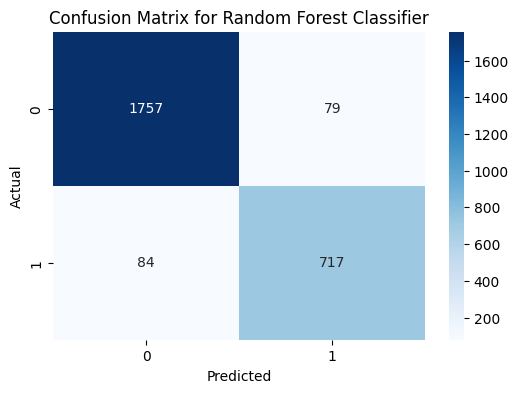

In [52]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This model is almost 94% accurate.

## Hyperparameter Tunning 

In [53]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [54]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [55]:
# Logistic Regression
best_lr_model, best_lr_params = perform_grid_search(lr_model, param_grid_lr)

# K-Nearest Neighbors
best_knn_model, best_knn_params = perform_grid_search(knn_model, param_grid_knn)

# Random Forest
best_rf_model, best_rf_params = perform_grid_search(rf_model, param_grid_rf)

In [56]:
models = {
    "Logistic Regression": best_lr_model,
    "K-Nearest Neighbors": best_knn_model,
    "Random Forest": best_rf_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

In [57]:
best_lr_params, best_knn_params, results

({'C': 1, 'solver': 'lbfgs'},
 {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'},
 {'Logistic Regression': {'Accuracy': 0.9427379598028062,
   'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96      1836\n           1       0.92      0.89      0.90       801\n\n    accuracy                           0.94      2637\n   macro avg       0.94      0.93      0.93      2637\nweighted avg       0.94      0.94      0.94      2637\n'},
  'K-Nearest Neighbors': {'Accuracy': 0.9431171786120591,
   'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96      1836\n           1       0.91      0.90      0.91       801\n\n    accuracy                           0.94      2637\n   macro avg       0.93      0.93      0.93      2637\nweighted avg       0.94      0.94      0.94      2637\n'},
  'Random Forest': {'Accuracy': 0.9461509290860827,
  

## Comparing Each Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


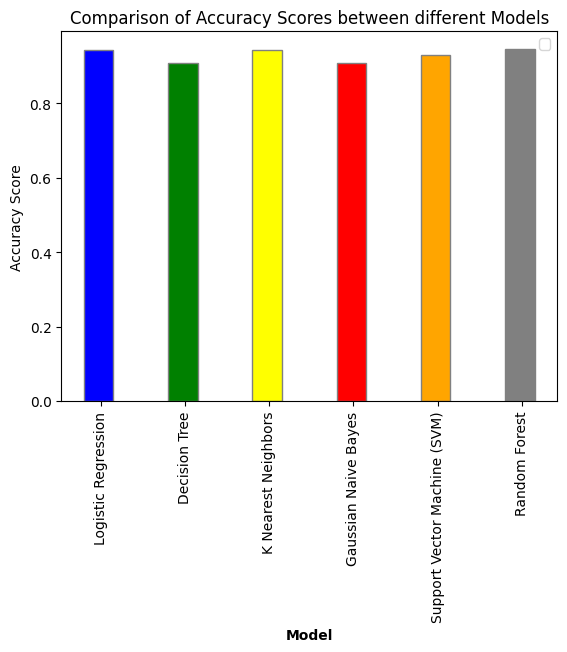

In [58]:
models = ['Logistic Regression', 'Decision Tree', 'K Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Machine (SVM)', 'Random Forest']
accuracy = [ 0.9427, 0.91, 0.9431, 0.91, 0.93, 0.9461]

bar_width = 0.35

r1 = np.arange(len(accuracy))


plt.bar(r1, accuracy, color=['b', 'g', 'yellow', 'r', 'orange', 'grey'], width=bar_width, edgecolor='grey')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy Score')
plt.xticks([r1 + bar_width/15 for r1 in range(len(accuracy))], models, rotation=90)
plt.title('Comparison of Accuracy Scores between different Models')

plt.legend()

plt.show()

## Content-Based Filtering Recommendation System

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df['combined_features'] = df['title'] + " " + df['listed_in']

In [60]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [61]:
# Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [62]:
# Function to Get Movie Recommendations

def get_recommendations(title, cosine_sim=cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = df[df['title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]  # Skipping the first because it's the movie itself
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


In [63]:
# Example: Get recommendations for a specific movie title

movie_title = 'Inception'
recommendations = get_recommendations(movie_title)
print("Recommendations for '{}':".format(movie_title))
print(recommendations)

Recommendations for 'Inception':
5550                    Next
4254                       9
5052                     Her
6299    The Space Between Us
4812             Dragonheart
3691                  Bright
3452             How It Ends
6213              The Matrix
3135              F.R.E.D.I.
977                 Stargate
Name: title, dtype: object


## Trend Prediction 

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

content_by_year = df.groupby('year_added').size().reset_index(name='release_count')

In [65]:
X = content_by_year[['year_added']]
y = content_by_year['release_count']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = rf_model.predict(X_test)

In [69]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 156418.17806666667


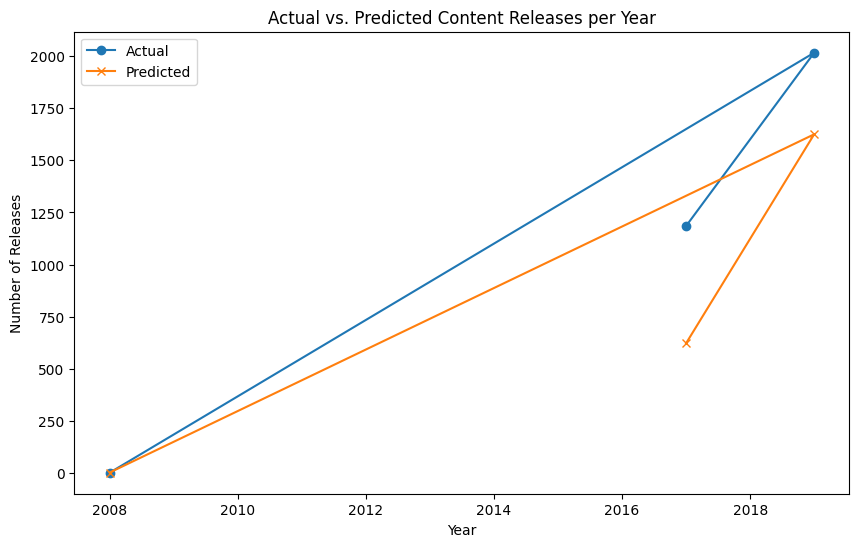

In [70]:
plt.figure(figsize=(10,6))
plt.plot(X_test, y_test, label='Actual', marker='o')
plt.plot(X_test, y_pred, label='Predicted', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Actual vs. Predicted Content Releases per Year')
plt.legend()
plt.show()

## Time Series Forecasting (ARIMA) for Content Releases

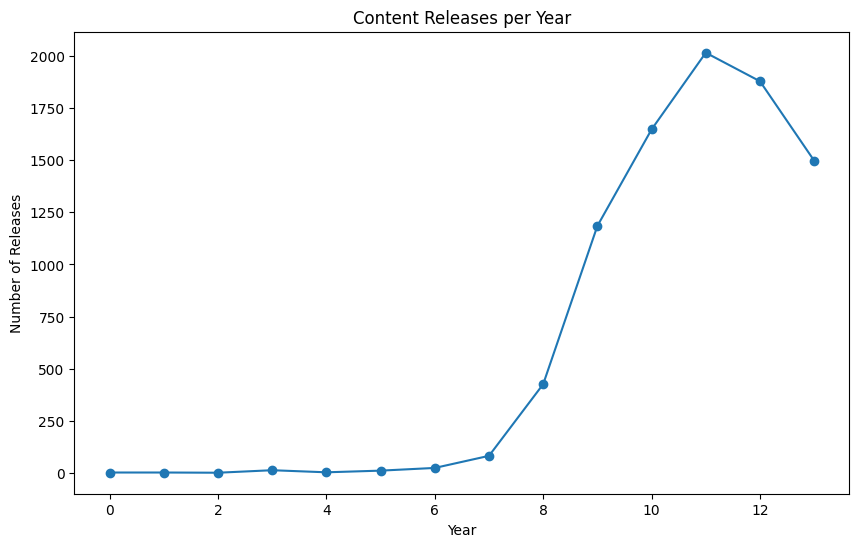

In [71]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(10,6))
plt.plot(content_by_year.index, content_by_year['release_count'], marker='o')
plt.title('Content Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

In [72]:
# Step 4: Fit ARIMA Model (Assuming data is stationary)
# p, d, q parameters can be fine-tuned based on model performance

model = ARIMA(content_by_year['release_count'], order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Step 5: Predict Future Trends
forecast_steps = 5  # Predict the next 5 years
forecast = model_fit.forecast(steps=forecast_steps)


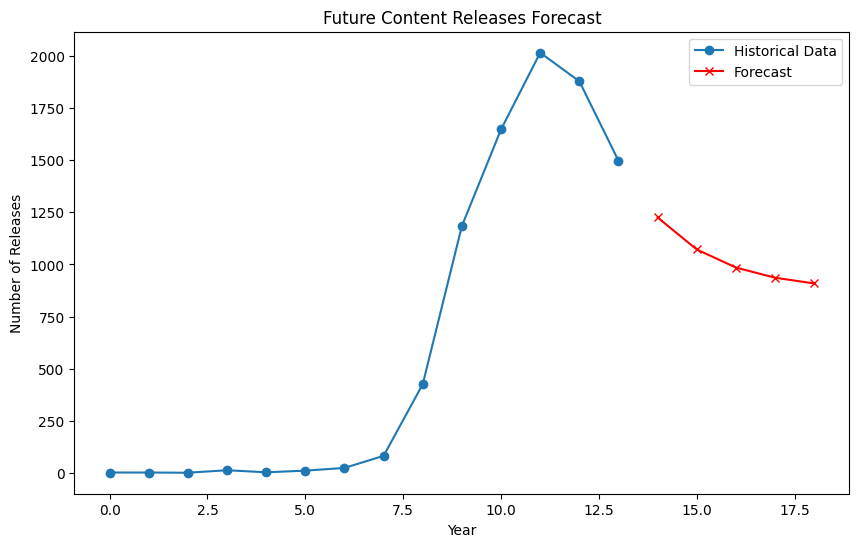

In [73]:
# Step 6: Visualize the forecast
plt.figure(figsize=(10,6))
plt.plot(content_by_year.index, content_by_year['release_count'], label='Historical Data', marker='o')
plt.plot(range(content_by_year.index[-1] + 1, content_by_year.index[-1] + forecast_steps + 1),
         forecast, label='Forecast', marker='x', color='red')
plt.title('Future Content Releases Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()

In [74]:
# Step 7: Evaluate the Model
train_data = content_by_year['release_count'][:-forecast_steps]
test_data = content_by_year['release_count'][-forecast_steps:]

# Calculate Mean Squared Error (if you have test data)
mse = mean_squared_error(test_data, forecast[:len(test_data)])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 526126.2830057038


## SARIMA Modeling

In [84]:
# Set the 'year_added' as the index
content_by_year.set_index('year_added', inplace=True)

# Inspect the data
print(content_by_year.head())

            release_count
year_added               
2008                    2
2009                    2
2010                    1
2011                   13
2012                    3


In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_data = content_by_year['release_count'][:int(0.8*len(content_by_year))]
test_data = content_by_year['release_count'][int(0.8*len(content_by_year)):]

# Fit SARIMA model (you can tune the parameters p, d, q, P, D, Q, and seasonal_period)
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting the next values
forecast = sarima_fit.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 70374.99997366668


c:\python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


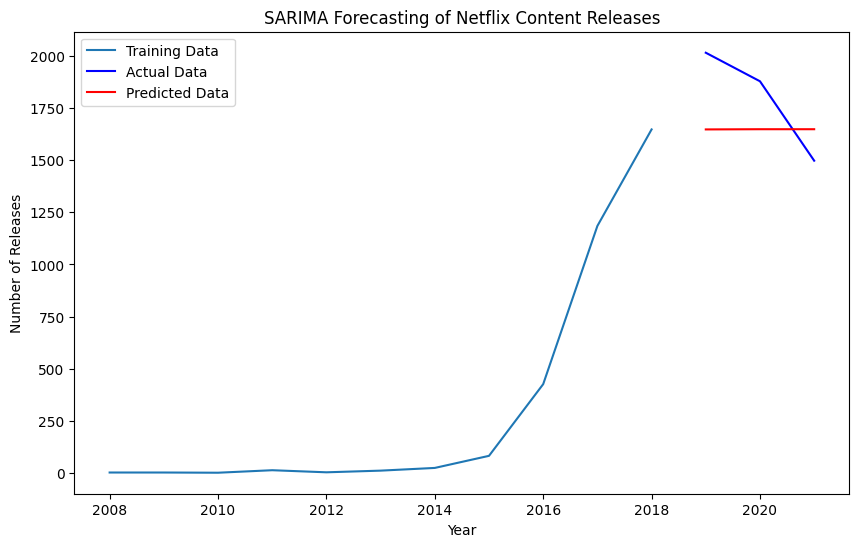

In [86]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data', color='blue')
plt.plot(test_data.index, forecast, label='Predicted Data', color='red')
plt.title('SARIMA Forecasting of Netflix Content Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()

## Forecast Future Trends

c:\python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


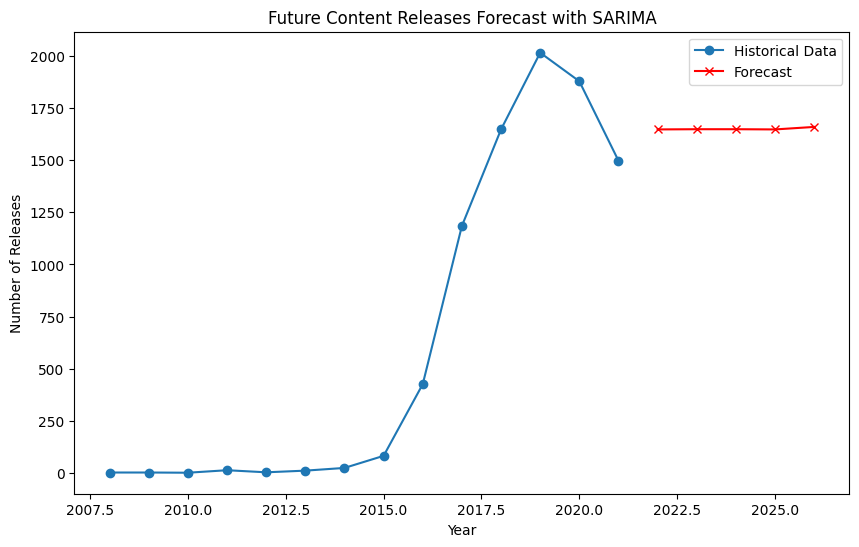

In [87]:
# Predict future releases for the next 5 years
future_forecast = sarima_fit.get_forecast(steps=5)
future_predictions = future_forecast.predicted_mean

# Create a future year index
future_years = np.arange(content_by_year.index.max() + 1, content_by_year.index.max() + 6)

# Plot the future forecast
plt.figure(figsize=(10,6))
plt.plot(content_by_year.index, content_by_year['release_count'], label='Historical Data', marker='o')
plt.plot(future_years, future_predictions, label='Forecast', marker='x', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Future Content Releases Forecast with SARIMA')
plt.legend()
plt.show()